In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Task 1

In [15]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = zp.shape[0]
n

10

In [6]:
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b

2.620538882402765

In [7]:
a = np.mean(ks) - b * np.mean(zp)
a

444.1773573243596

In [13]:
y_pred = a + zp * b

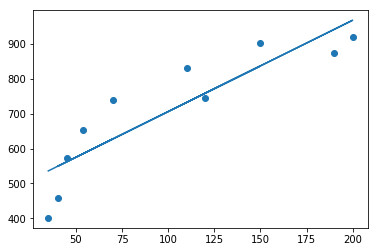

In [14]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred)

In [16]:
mse_ = np.sum((y_pred - ks)**2) / n
mse_

6470.414201176658

#### Without Intersept

In [18]:
x = zp.reshape((1, 10))
x

array([[ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]])

In [19]:
y = ks.reshape((1, 10))
y

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [23]:
np.dot(np.linalg.inv(np.dot(x, x.T)), x) @ y.T

array([[5.88982042]])

In [25]:
mse1_ = np.sum((y_pred1 - ks)**2) / n
mse1_

56518.286

#### With intersept

In [26]:
x = zp.reshape((1, 10))
X = np.vstack([np.ones((1, 10)), x])
X

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.]])

In [27]:
y = ks.reshape((1, 10))
y

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [29]:
np.dot(np.linalg.inv(np.dot(X, X.T)), X) @ y.T

array([[444.17735732],
       [  2.62053888]])

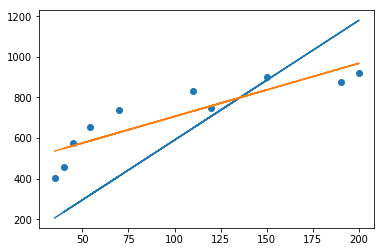

In [30]:
y_pred1 = zp * 5.9
y_pred2 = 444.177 + 2.62 * zp
plt.scatter(zp, ks)
plt.plot(zp, y_pred1)
plt.plot(zp, y_pred2)

#### Вывод:     Результаты расчета с intercept равны по 2м вариантам расчета.  intercept = 444; slope = 2.62; mse = 6470.      Без  intercept slope = 5.9; mse = 56518.     Оптимальная модель  - это минимальный кредитный скоринг 444 балла.    При увеличении зарплаты на 1 тыс рублей, кредитный скоринг увеличивается на 2.62 балла.

###  Task 2

In [32]:
def mse_(w1, y = y[0], X= X[1], n =10):
    return np.sum((w1*X - y) ** 2) / n

In [33]:
mse_(5.9)

56518.286

In [54]:
alpha = 1e-6

In [67]:
w1 = 0.1

In [36]:
f = (1/n) * np.sum((w1*X - y)**2)
f_p = (2/n) * np.sum((w1 * X - y) * X)

In [68]:
for i in range (360):
    w1 -= alpha * (2/n) * np.sum((w1 * X - y) * X)
    if i % 20 == 0:
        print(f'Iteration: {i}, w1 = {w1:.2f}, mse = {mse_(w1):.0f}')

Iteration: 0, w1 = 0.26, mse = 493018
Iteration: 20, w1 = 2.69, mse = 197335
Iteration: 40, w1 = 4.08, mse = 101474
Iteration: 60, w1 = 4.88, mse = 70604
Iteration: 80, w1 = 5.33, mse = 60782
Iteration: 100, w1 = 5.59, mse = 57726
Iteration: 120, w1 = 5.74, mse = 56817
Iteration: 140, w1 = 5.83, mse = 56571
Iteration: 160, w1 = 5.88, mse = 56520
Iteration: 180, w1 = 5.90, mse = 56520
Iteration: 200, w1 = 5.92, mse = 56529
Iteration: 220, w1 = 5.93, mse = 56538
Iteration: 240, w1 = 5.93, mse = 56544
Iteration: 260, w1 = 5.94, mse = 56547
Iteration: 280, w1 = 5.94, mse = 56550
Iteration: 300, w1 = 5.94, mse = 56551
Iteration: 320, w1 = 5.94, mse = 56552
Iteration: 340, w1 = 5.94, mse = 56552


### Task 3

Теорема Лапласа дает хорошее приближение при n*p*q > 10, где n -количество испытаний , p - вероятность того, что событие произойдет , q - вероятность того, что событие не произойдет. Если малое число повторный измерений, данные выборки распределены ненормально и/или неизвестна генеральная дисперсия, выборочное  среднее подчиняется t-распределению Стьюдента.